# Data EDA

In [2]:
%matplotlib inline
from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
# load the provided data
train_df = pd.read_csv('data/.csv')

In [7]:
# 計算所有特徵與 total_cases 之間的相關係數
correlation_matrix = train_df.corr()
correlation_with_target = correlation_matrix["total_cases"].sort_values(ascending=False)
correlation_with_target

total_cases                                   1.000000
reanalysis_min_air_temp_k                     0.318554
city                                          0.292624
reanalysis_air_temp_k                         0.251888
station_min_temp_c                            0.250506
weekofyear                                    0.214131
reanalysis_specific_humidity_g_per_kg_lag2    0.143939
reanalysis_avg_temp_k                         0.137607
reanalysis_specific_humidity_g_per_kg_lag1    0.132786
reanalysis_dew_point_temp_k                   0.130099
reanalysis_specific_humidity_g_per_kg         0.117518
station_avg_temp_c                            0.096827
reanalysis_air_temp_k_lag1                    0.052110
reanalysis_air_temp_k_lag2                    0.051769
reanalysis_avg_temp_k_lag2                    0.040929
reanalysis_avg_temp_k_lag1                    0.036859
reanalysis_precip_amt_kg_per_m2              -0.009500
ndvi_var                                     -0.012388
precipitat

In [10]:
# 設定相關性閾值
threshold = 0.15
selected_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()
selected_features.remove('total_cases')  # 移除目標變數

print("選擇的特徵:", selected_features,len(selected_features))


選擇的特徵: ['reanalysis_min_air_temp_k', 'city', 'reanalysis_air_temp_k', 'station_min_temp_c', 'weekofyear', 'ndvi_mean', 'ndvi_mean_lag1', 'ndvi_mean_lag2', 'reanalysis_max_air_temp_k', 'station_diur_temp_rng_c', 'reanalysis_tdtr_k', 'year'] 12


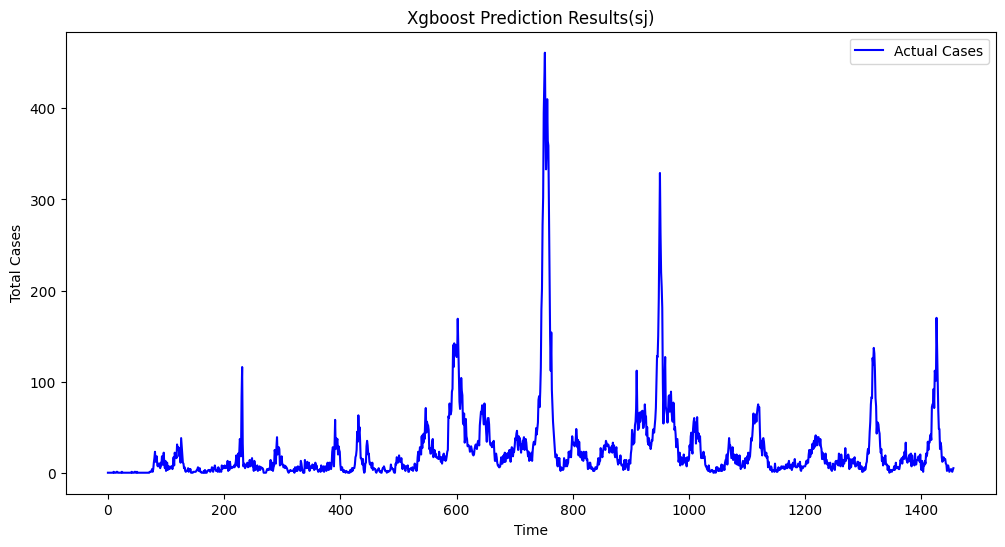

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train_df['total_cases'], label="Actual Cases", color='blue')
plt.xlabel("Time")
plt.ylabel("Total Cases")
plt.title("Xgboost Prediction Results(sj)")
plt.legend()
plt.show()

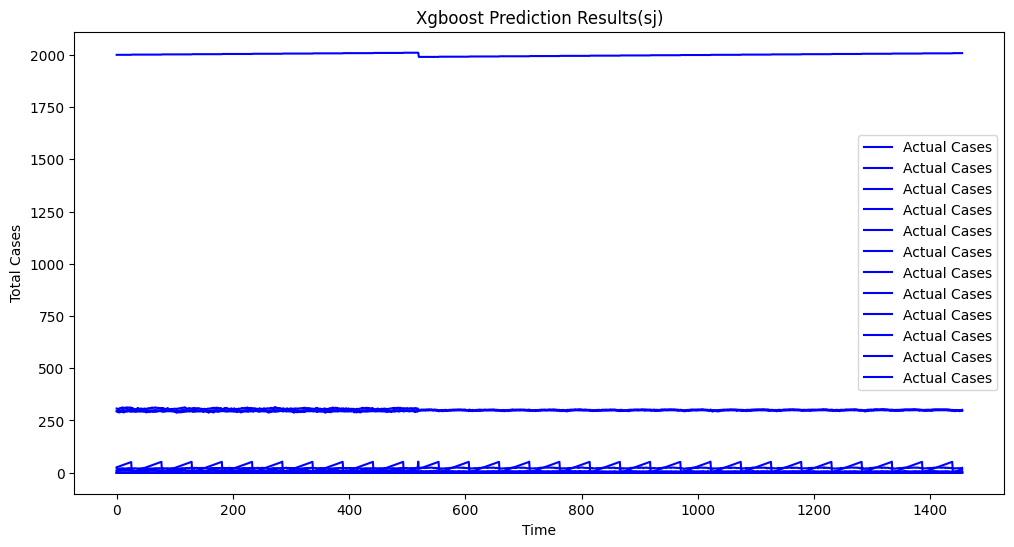

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train_df[selected_features], label="Actual Cases", color='blue')
plt.xlabel("Time")
plt.ylabel("Total Cases")
plt.title("Xgboost Prediction Results(sj)")
plt.legend()
plt.show()